## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## Loading the data

In [4]:
gstock_data=pd.read_csv('mean_sentiment.csv')
gstock_data.rename(columns = {'mean_sentment' : 'Sentiment'}, inplace = True); gstock_data

,Unnamed: 0,Date,Open,High,Low,Close,Sentiment
0,0,2022-05-06,34569.10,34797.95,34353.20,34591.20,[0.83375764 0.07719209 0.08905027]
1,1,2022-05-05,35705.35,35934.85,35133.80,35232.85,[7.79157295e-01 2.20632142e-01 2.10561680e-04]
2,2,2022-05-04,36266.15,36309.30,35127.85,35264.55,[0.78033398 0.13505056 0.08461548]
3,3,2022-05-02,35627.60,36235.25,35618.20,36163.75,[0.66017325 0.25689701 0.08292977]
4,4,2022-04-29,36474.05,36718.80,35978.95,36088.15,[0.46692673 0.28339684 0.24967646]
...,...,...,...,...,...,...,...
3299,3299,2009-01-07,5416.35,5440.55,4954.00,4984.50,[0.44654493 0.27637475 0.27708032]
3300,3300,2009-01-06,5333.50,5448.80,5276.40,5395.30,[0.44654493 0.27637475 0.27708032]
3301,3301,2009-01-05,5273.45,5371.10,5273.45,5359.40,[0.44654493 0.27637475 0.27708032]
3302,3302,2009-01-02,5154.20,5258.65,5103.60,5195.10,[0.44654493 0.27637475 0.27708032]


In [5]:

S=gstock_data['Sentiment']
for  j in range(len(S)):
    s=S[j].replace('[','').replace(',','').replace(']','').split()
    for i in range(len(s)):
        s[i]=float(s[i])
    S[j]=s
gstock_data['Sentiment']=S

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
gstock_data = gstock_data.drop(['Unnamed: 0'], axis = 1)
gstock_data['Date'] = pd.to_datetime(gstock_data['Date'], format='%Y-%m-%d')
gstock_data = gstock_data.sort_values(by='Date',ascending=True)
gstock_data['Date'] = gstock_data['Date'].dt.strftime('%d-%m-%Y') 
gstock_data.set_index('Date',drop=True,inplace=True) 
gstock_data.head(15)

,Open,High,Low,Close,Sentiment
Date,,,,,
01-01-2009,5019.20,5135.15,5019.20,5116.5,"[0.44654493, 0.27637475, 0.27708032]"
02-01-2009,5154.20,5258.65,5103.60,5195.1,"[0.44654493, 0.27637475, 0.27708032]"
05-01-2009,5273.45,5371.10,5273.45,5359.4,"[0.44654493, 0.27637475, 0.27708032]"
06-01-2009,5333.50,5448.80,5276.40,5395.3,"[0.44654493, 0.27637475, 0.27708032]"
07-01-2009,5416.35,5440.55,4954.00,4984.5,"[0.44654493, 0.27637475, 0.27708032]"
09-01-2009,4891.80,5056.95,4840.00,4906.7,"[0.44654493, 0.27637475, 0.27708032]"
12-01-2009,4862.00,4881.50,4612.75,4698.0,"[0.44654493, 0.27637475, 0.27708032]"
13-01-2009,4700.25,4764.15,4605.65,4661.7,"[0.44654493, 0.27637475, 0.27708032]"
14-01-2009,4684.30,4819.50,4682.10,4751.1,"[0.44654493, 0.27637475, 0.27708032]"


In [28]:
data = gstock_data.drop(['Open', 'High', 'Low','Sentiment'], axis = 1); data

,Close
Date,
01-01-2009,5116.50
02-01-2009,5195.10
05-01-2009,5359.40
06-01-2009,5395.30
07-01-2009,4984.50
...,...
29-04-2022,36088.15
02-05-2022,36163.75
04-05-2022,35264.55


In [29]:
date = list(gstock_data.index)

In [9]:
news = gstock_data['Sentiment'].to_list()

## Data loader and train -test split

In [19]:
def load_data(stock, look_back):
    data_raw = stock # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.1*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    new_sent_train = news[5:train_set_size+5]
    new_sent_train = np.array(new_sent_train)
    date_train = date[5:train_set_size+5]

    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    new_sent_test = news[train_set_size+5:-1]
    new_sent_test = np.array(new_sent_test)
    date_test = date[train_set_size+5:-1]
    return [x_train, y_train, new_sent_train, date_train, x_test, y_test, new_sent_test, date_test]
    #return data

In [30]:
sc = MinMaxScaler()
data = sc.fit_transform(data)
x_train, y_train, new_sent_train, date_train, x_test, y_test, new_sent_test, date_test = load_data(data, 6)

print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('new_sent_train = ', new_sent_train.shape)
print('date_train.shape = ', len(date_train))
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)
print('new_sent_test = ', new_sent_test.shape)
print('date_test.shape = ', len(date_test))

x_train.shape =  (2968, 5, 1)
y_train.shape =  (2968, 1)
new_sent_train =  (2968, 3)
date_train.shape =  2968
x_test.shape =  (330, 5, 1)
y_test.shape =  (330, 1)
new_sent_test =  (330, 3)
date_test.shape =  330


In [31]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)
new_sent_train = torch.from_numpy(new_sent_train).type(torch.Tensor)
new_sent_test = torch.from_numpy(new_sent_test).type(torch.Tensor)

## Building the model 

In [32]:
# Build model
#####################
input_dim = 1
hidden_dim = 5
num_layers = 4 
output_dim = 1
sent_dim = 3

# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, sent_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        

        # Readout layer
        self.fc = nn.Linear(hidden_dim+sent_dim, output_dim)

    def forward(self, x, d):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        ##out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        out = out[:, -1, :]
        x1 = torch.cat((out, d), dim = 1)
        output = self.fc(x1)
        return output
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, sent_dim=sent_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 5, num_layers=4, batch_first=True)
  (fc): Linear(in_features=8, out_features=1, bias=True)
)
18
torch.Size([20, 1])
torch.Size([20, 5])
torch.Size([20])
torch.Size([20])
torch.Size([20, 5])
torch.Size([20, 5])
torch.Size([20])
torch.Size([20])
torch.Size([20, 5])
torch.Size([20, 5])
torch.Size([20])
torch.Size([20])
torch.Size([20, 5])
torch.Size([20, 5])
torch.Size([20])
torch.Size([20])
torch.Size([1, 8])
torch.Size([1])


In [33]:
sum(i.numel() for i in model.parameters()) ##no. of parameters

889

## Training

In [34]:
# Train model
#####################
num_epochs = 850
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =5  


for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train, new_sent_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.046370524913072586
Epoch  20 MSE:  0.04049823060631752
Epoch  30 MSE:  0.014081268571317196
Epoch  40 MSE:  0.006771520711481571
Epoch  50 MSE:  0.004274907521903515
Epoch  60 MSE:  0.002720054006204009
Epoch  70 MSE:  0.0017293713754042983
Epoch  80 MSE:  0.0012870924547314644
Epoch  90 MSE:  0.0009612930007278919
Epoch  100 MSE:  0.0007542453822679818
Epoch  110 MSE:  0.0006101541221141815
Epoch  120 MSE:  0.0005043447599746287
Epoch  130 MSE:  0.00042530210339464247
Epoch  140 MSE:  0.0004220087139401585
Epoch  150 MSE:  0.0003509233065415174
Epoch  160 MSE:  0.00040285830618813634
Epoch  170 MSE:  0.0002849016455002129
Epoch  180 MSE:  0.0002689742250367999
Epoch  190 MSE:  0.00024456772371195257
Epoch  200 MSE:  0.00023383621009998024
Epoch  210 MSE:  0.00022638477094005793
Epoch  220 MSE:  0.00021933186508249491
Epoch  230 MSE:  0.00021426015882752836
Epoch  240 MSE:  0.00020993691578041762
Epoch  250 MSE:  0.00020633882377296686
Epoch  260 MSE:  0.0002033407654

## Testing

In [35]:
 # make predictions
y_test_pred = model(x_test, new_sent_test)
y_train_pred = model(x_train, new_sent_train)


# invert predictions
y_train_pred = sc.inverse_transform(y_train_pred.data.numpy())
y_train = sc.inverse_transform(y_train.data.numpy())
y_test_pred = sc.inverse_transform(y_test_pred.data.numpy())
y_test = sc.inverse_transform(y_test.data.numpy())

# calculate root mean squared error
trainScore = sqrt(mse(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = sqrt(mse(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 473.68 RMSE
Test Score: 1471.77 RMSE


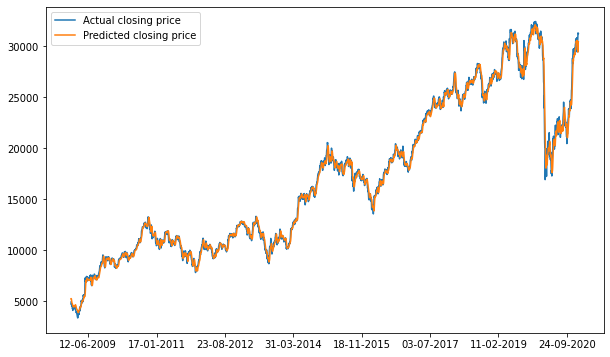

In [36]:
plt.figure(figsize=(10,6))
plt.plot(y_train, label = 'Actual closing price')
plt.plot(y_train_pred, label = 'Predicted closing price')
index = np.arange(100,2928,400)

plt.xticks(index, labels = date_train[100:2928:400])
plt.legend()
plt.show()

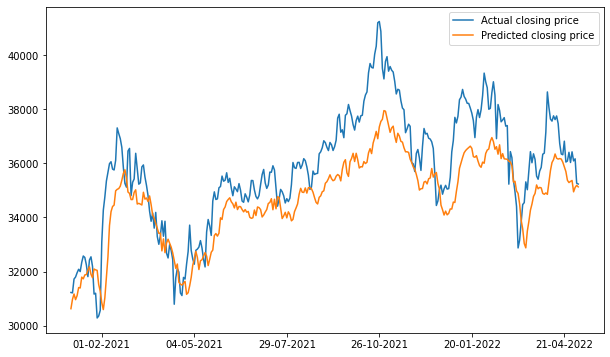

In [37]:
plt.figure(figsize=(10,6))
plt.plot(y_test, label = 'Actual closing price')
plt.plot(y_test_pred, label = 'Predicted closing price')
index = np.arange(20,330,60)
plt.xticks(index, labels = date_test[20:330:60])
plt.legend()
plt.show()